################### Calculation of Tokens,Types,TTR ###################
Number of tokens : 74927
Number of types : 7487
TTR : 0.0999

################### Zipf's Law for Rank ###################

It states that frequecy = k / rank , where k is constant


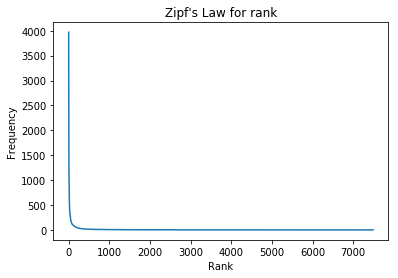


################### Zipf's Law for Length ###################

It states that length = k / frequecy , where k is constant


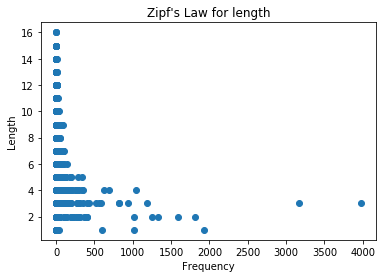


################### Heap's Law ###################

It states that |v| = k * (N^B) , where k is constant


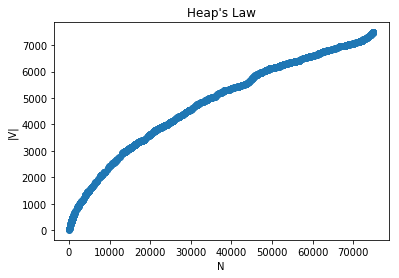

Value of beta : 0.6430372109365992
Value of K : 5.898244484522174

################### Zipf's Law for Meaning ###################

It states that meaning = k * sqrt(frequency) , where k is constant

We will plot graph for log(m) = log(k) + 0.5 * log(frequency) 
Here y-intercept = log(k) and Slope = 0.5 


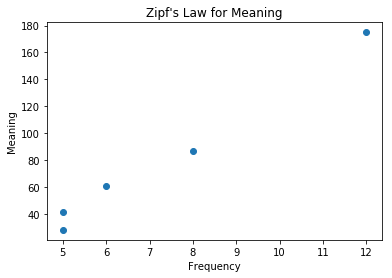

Slope :0.51170657454046 which is approximately 0.5


In [19]:
from nltk.tokenize import word_tokenize
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit 
import numpy as np


print('################### Calculation of Tokens,Types,TTR ###################')
listTokens = []
f = open(r"C:\Users\Dhananjay Sonawane\Desktop\tom.txt","r")              # Provide path of book here
contents = f.read()
#contents = 'This is, sample 123 123 123'
allWords = word_tokenize(contents)
reg = '[A-Za-z0-9]*'

for word in allWords:
    token = re.match(reg,word)
    str1 = token.group(0)
    if str1 != '':
        #print(token)
        listTokens.append(str1.lower())
noTokens = len(listTokens)
print('Number of tokens : ' + str(noTokens))

types = set(listTokens)
noTypes = len(types)
print('Number of types : ' + str(noTypes))

TTR = noTypes / noTokens
print('TTR : ' + str(round(TTR,4)))

print('')
print('################### Zipf\'s Law for Rank ###################')
print('')
print('It states that frequecy = k / rank , where k is constant')
wordFreq = {}
for word in listTokens:
    if word not in wordFreq.keys():
        wordFreq[word] = listTokens.count(word)

x = 0
freq = []
counts = []
count = 0
length = []
for k,v in reversed(sorted(wordFreq.items(), key = itemgetter(1))):
    #print(k,v)
    count += 1
    freq.append(v)
    counts.append(count)
    length.append(len(k))
    
plt.plot(counts,freq)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law for rank' )
plt.show()

print('')
print('################### Zipf\'s Law for Length ###################')
print('')
print('It states that length = k / frequecy , where k is constant')
plt.scatter(freq,length)
plt.xlabel('Frequency')
plt.ylabel('Length')
plt.title('Zipf\'s Law for length' )
plt.show()    

print('')
print('################### Heap\'s Law ###################')
print('')
print('It states that |v| = k * (N^B) , where k is constant')
paras = contents.split('\n\n')
#print(paras)
v = []
N = []
paraTkn = 0
paraType = 0
s = {0}
for para in paras:
    #print(para)
    paraToken = word_tokenize(para)
    listTkn = []
    
    for wrd in paraToken:
        tkn = re.match(reg,wrd)
        str2 = tkn.group(0)
        if str2 != '':
            listTkn.append(str2.lower())
    
    if len(listTkn) > 0:
        #print(listTkn)
        #print(paraTkn,paraType)
        paraTkn += len(listTkn)
        s = s.union(set(listTkn))
        paraType = len(s)
        v.append(paraType)
        N.append(paraTkn)
plt.scatter(N,v)
plt.xlabel('N')
plt.ylabel('|V|')
plt.title('Heap\'s Law')
plt.show()
#print(paraTkn)
#print(np.polynomial.polynomial.polyfit(N, v, 2))
slope , inter = np.polyfit(np.log(N),np.log(v),1)
print('Value of beta : ' + str(slope))
print('Value of K : ' + str(np.exp(inter)))

print('')
print('################### Zipf\'s Law for Meaning ###################')
print('')
print('It states that meaning = k * sqrt(frequency) , where k is constant')
print('')
print('We will plot graph for log(m) = log(k) + 0.5 * log(frequency) ')
print('Here y-intercept = log(k) and Slope = 0.5 ')

# Words frequency meaning
'''about 175 12
project 87 8
enough 61 6
door 45 4
awful 41 5
church 30 7
window 28 5'''

word1 = ['about','project','enough','awful','window']
meaning = [12,8,6,5,5]
freqWord = []

for wrd1 in word1:
    freqWord.append(wordFreq.get(wrd1))

plt.scatter(meaning,freqWord)
plt.xlabel('Frequency')
plt.ylabel('Meaning')
plt.title('Zipf\'s Law for Meaning')
plt.show()
#print(paraTkn)
#print(np.polynomial.polynomial.polyfit(N, v, 2))
slope1 , inter1 = np.polyfit(np.log(freqWord),np.log(meaning),1)
print('Slope :' + str(slope1) + ' which is approximately 0.5')

Zipf's Law for length will hold true when we have large corpus i.e. when we plot length of types vs frequency where we have large number of inputs available, zipf's law gives more accurate result